# 회귀분석이란?

회귀 분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 $\hat{y}$을 출력하는 $f(x)$를 찾는 과정이다  
즉, 컴퓨터에게 $f(x)$을 찾으라는 것과 같다.

만약 선형회귀함수를 써서 모델을 만들려고 한다면, 이러한 함수를 선형회귀모형이라고 함.  
그리고 이를 사용하는 회귀분석을 선형회귀분석이라고 함

ex) 선형회귀분석 수식 예시 $\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots w_nx_n$  

ex) 우리가 흔히 봐왔던 수식 $y = ax_1+bx_2+c$ 




# 회귀 분석의  전체 수식
$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

#### 우리가 어떤 수식을 예측하려고 할 때, 우리가 예측한 수식이 실제 수식과 같은지를 알 수 있는 방법은 무엇일까?  
= 우리가 예측한 수식으로 얻은 값과 실제 수식이 얻은 값의 차이를 보면 됨  
= 실제 수식 - 예측한 수식 = 차이  
이러한 차이를 최소화하는 것이 우리의 목표인데  

1) 실제 수식 > 예측한 수식일 경우 차이가 양수
2) 실제 수식 < 예측한 수식일 경우 차이가 음수  

차이를 잔차라고 부르는데, 이 차이를 제곱해서 합한 것을 잔차제곱합이라고 부름.  

잔차제곱합이 작으면 작을수록 실제값과 차이가 적다 = 이러한 가중치($w_D$)를 찾아야 한다

이러한 잔차제곱합을 최소화하는 가중치를 찾는 방법을 최소자승법(OLS)이라고 부름

최소자승법을 구할 때 잔차가 최소화되는 조건은 잔차제곱합 / 가중치로 미분한 것이 0이 되어야함

In [15]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

bias = 100
X0,y,w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef = True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)

In [16]:
print(w)

86.44794300545998


우리가 만든 식 : $y$ = $100 + 86.447943x + \epsilon $ 

In [17]:
#OLS(최소자승법) 사용하기
w = np.linalg.inv(X.T@X) @ X.T@y
print(w)

[[99.79150869]
 [86.96171201]]


예측한 식 : $\hat{y}$ = $99.79150869 + 86.96171201 x $ 

### 최소자승법 실제 그래프와 예측한 값의 차이를 그래프로 확인하기

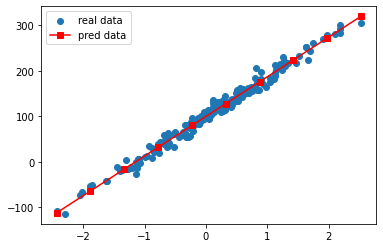

In [22]:
x_new = np.linspace(np.min(X0), np.max(X0),10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new,w)

plt.scatter(X0, y, label = 'real data')
plt.plot(x_new,y_new, 'rs-', label = 'pred data')
plt.legend()
plt.show()

## 보스턴 부동산 데이터를 잔차제곱합 방식을 통해 예측하기

In [5]:
#보스턴 부동산 데이터 로드
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm

In [6]:
boston = load_boston()

#독립변수 데이터 만들기
dfX0 = pd.DataFrame(boston.data, columns= boston.feature_names)

#독립변수와 종속변수 데이터를 모델에 집어넣기
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV']) #df['종속변수']

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 12 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        10:17:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0